In [1]:
%cd ../

/home/tk/repos/erc


In [2]:
from src import read_json, read_yaml, gets_DATASET_kwargs
from src import get_tokenizer_model_ds, get_diaid_uttid_utts, return_coeffs

model_checkpoint = 'results/MELD/roberta-large/2021-05-23-00-20-58/4/checkpoint-12490/'
# model_checkpoint = 'results/IEMOCAP/roberta-large/2021-05-21-07-58-04/3/checkpoint-4780/'


DATASET, kwargs = gets_DATASET_kwargs(model_checkpoint)
DATASET, kwargs

/home/tk/repos/erc/utils/helper.py:28: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  foo = yaml.load(stream)


('MELD',
 {'ADD_BOU_EOU': False,
  'ADD_SPEAKER_TOKENS': True,
  'BATCH_SIZE': 4,
  'DATASET': 'MELD',
  'HP_N_TRIALS': 5,
  'HP_ONLY_UPTO': 103,
  'NUM_TRAIN_EPOCHS': 5,
  'REPLACE_NAMES_IN_UTTERANCES': False,
  'SEEDS': [0, 1, 2, 3, 4],
  'SPEAKER_SPLITS': ['train', 'val', 'test'],
  'WARMUP_RATIO': 0.2,
  'WEIGHT_DECAY': 0.01,
  'model_checkpoint': 'roberta-large',
  'num_future_utterances': 0,
  'num_past_utterances': 1000,
  'training_config': 'train-erc-text2.yaml'})

In [3]:
SPLIT = 'val'
tokenizer, model, ds = get_tokenizer_model_ds(DATASET, kwargs, model_checkpoint, SPLIT=SPLIT)

100%|██████████| 114/114 [00:00<00:00, 3319.04it/s]
2021-05-31 21:27:06.288 INFO dataset - _load_utterance_ordered: every text file exists fine!
2021-05-31 21:27:06.289 INFO dataset - _string2tokens: converting utterances into tokens ...
2021-05-31 21:27:06.291 INFO dataset - _string2tokens: creating input utterance data ... 
100%|██████████| 114/114 [00:01<00:00, 85.30it/s]
2021-05-31 21:27:08.290 INFO dataset - _create_input: number of truncated utterances: 0


idx: 684

diaid: dia54 
uttid: dia54_utt2

[0, 50435, 45636, 4, 4129, 3540, 1610, 116, 50474, 33082, 6, 8578, 4, 2, 2, 50474, 1106, 38, 58, 41529, 41098, 13, 10, 183, 6, 38, 74, 236, 6, 7252, 6, 232, 1987, 6, 117, 55, 12226, 6, 205, 383, 13, 5, 1895, 12, 28236, 734, 2409, 2671, 39499, 328, 2]

<s><Monica>Alright. Phoebe?<Phoebe>Okay, okay.</s></s><Phoebe>If I were omnipotent for a day, I would want, um, world peace, no more hunger, good things for the rain-forest...And bigger boobs!</s>

(joy) <Phoebe>If I were omnipotent for a day, I would want, um, world peace, no more hunger, good things for the rain-forest...And bigger boobs!

'dia54_utt0, (neutral) <Monica>Alright. Phoebe?'
'dia54_utt1, (neutral) <Phoebe>Okay, okay.'
('dia54_utt2, (joy) <Phoebe>If I were omnipotent for a day, I would want, um, '
 'world peace, no more hunger, good things for the rain-forest...And bigger '
 'boobs!')
('dia54_utt3, (neutral) <Ross>Yeah, see.. you took mine. Chandler, what about '
 'you?')
("dia54_ut

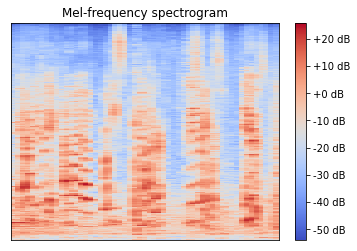

In [6]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from src import load_audio, audio2spectrogram

sr=22050
n_mels=128*8
n_fft=2048*8
hop_length=512*8
win_length=None

idx, input_ids, attention_mask, labelid, decoded, diaid, uttid, utt, utts = get_diaid_uttid_utts(ds, tokenizer)
print()
print(f"number of tokens in the sequence:  {input_ids.shape}")
print()

y = load_audio(DATASET, SPLIT, uttid, sr=sr)
print(f"audio length {y.shape}")
# IPython.display.Audio(data=y, rate=sr)


mels = audio2spectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length, n_mels=n_mels)
print(f"mels shape {mels.shape}")
mels_db = librosa.power_to_db(mels)

fig, ax = plt.subplots()
img = librosa.display.specshow(mels_db)
fig.colorbar(img, ax=ax, format='%+2.0f dB');
ax.set(title='Mel-frequency spectrogram');

In [8]:
from src import ErcAudioDataset, read_yaml

audio_config = read_yaml('./train-erc-audio.yaml')


ds_audio= ErcAudioDataset(**audio_config)

/home/tk/repos/erc/utils/helper.py:28: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  foo = yaml.load(stream)
2021-05-31 21:27:32.705 INFO dataset - get_special_tokenzier: 304 speaker-specific tokens added.
2021-05-31 21:27:32.708 INFO dataset - get_special_tokenzier: In total of 304 special tokens added.
 10%|▉         | 100/1038 [00:00<00:02, 461.86it/s]/home/tk/.virtualenvs/dev-python3.7/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
100%|██████████| 1038/1038 [00:02<00:00, 420.02it/s]
2021-05-31 21:27:35.193 WARNING dataset - _load_utterance_ordered: number of not existing audio files: 1
2021-05-31 21:27:35.194 INFO dataset - _calculate_tokens: calculating tokens ...
2021-05-31 21:27:35.197 INFO dataset - _calculate_tokens: creating inpu

In [20]:
from pprint import pprint
idx = 126
print(ds_audio.inputs_text[idx])
print(ds_audio.tokens_length[idx])
print(ds_audio.uttids[idx])
print()
print(tokenizer.decode(ds_audio.inputs_text[idx]['input_ids']))
print()
print(len(ds_audio.inputs_text[idx]['input_ids']), sum(ds_audio.tokens_length[idx]))

{'input_ids': [0, 1, 10643, 768, 328, 4041, 41, 30603, 74, 3568, 42, 2682, 114, 47, 399, 17, 27, 90, 33, 5, 512, 328, 5143, 116, 1, 1711, 16, 1528, 4, 1, 14783, 6, 53, 129, 10, 16333, 74, 26124, 10, 34753, 46756, 1751, 4, 1, 7516, 6, 38, 17, 27, 548, 57, 89, 4, 8976, 6, 38, 524, 6908, 213, 1305, 127, 15091, 4, 1, 18393, 219, 6, 47, 216, 47, 218, 17, 27, 90, 888, 33, 65, 4, 1, 22817, 15, 328, 653, 32, 47, 608, 17516, 38, 17, 27, 119, 11, 2048, 328, 11258, 47, 1067, 7, 69, 328, 1, 17986, 298, 6, 38, 206, 24, 95, 1410, 4, 85, 17, 27, 29, 269, 34552, 162, 4, 1, 3684, 235, 6, 14, 17, 27, 29, 24, 6, 52, 17, 27, 241, 164, 7, 5, 1923, 929, 4, 1, 2264, 17516, 440, 6, 47, 64, 17, 27, 90, 6, 47, 64, 17, 27, 90, 989, 162, 259, 19, 106, 328, 166, 17, 27, 241, 1928, 12, 29, 9451, 328, 1, 133, 7272, 32, 15028, 6, 38, 17, 27, 119, 686, 47, 17, 27, 890, 28, 8578, 15, 110, 308, 13, 10, 150, 328, 1, 1708, 47, 12, 6968, 64, 17, 27, 90, 989, 162, 19, 106, 328, 166, 12, 1694, 17, 27, 241, 10, 165, 328, 166,

In [ ]:
import transformers.models.roberta

In [ ]:
from transformers.models.roberta.modeling_roberta import RobertaEmbeddings

In [ ]:
# import json

# with open('./foo.json', 'r') as stream:
#     config = json.load(stream)
    
# rc = RobertaConfig(config)

re = RobertaEmbeddings(model_.config)

In [147]:
re

RobertaEmbeddings(
  (word_embeddings): Embedding(308, 1024, padding_idx=1)
  (position_embeddings): Embedding(514, 1024, padding_idx=1)
  (token_type_embeddings): Embedding(1, 1024)
  (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
nn.Embedding?

In [ ]:
torch.tensor([0, 1,2]).view(1,-1).shape

In [ ]:
re.forward(input_ids=torch.tensor([0, 1,2]).view(1,-1))

In [ ]:
model_.config.vocab_size = 308

In [ ]:
model_.config

2021-05-31 16:48:24.159 INFO dataset - get_special_tokenzier: 304 speaker-specific tokens added.
2021-05-31 16:48:24.161 INFO dataset - get_special_tokenzier: In total of 304 special tokens added.
/home/tk/.virtualenvs/dev-python3.7/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2021-05-31 16:48:26.536 WARNING dataset - _load_utterance_ordered: number of not existing audio files: 1


In [151]:
foo.tokens

{'<s>': 0,
 '<pad>': 1,
 '</s>': 2,
 '<1St Customer>': 3,
 '<2Nd Customer>': 4,
 '<3Rd Customer>': 5,
 '<A Female Student>': 6,
 '<A Student>': 7,
 '<A Waiter>': 8,
 '<Airline Employee>': 9,
 '<Alan>': 10,
 '<Alice>': 11,
 '<All>': 12,
 '<Allesandro>': 13,
 '<An>': 14,
 '<Angela>': 15,
 '<Annabelle>': 16,
 '<Another Scientist>': 17,
 '<Another Tour Guide>': 18,
 '<Aunt Lillian>': 19,
 '<Barry>': 20,
 '<Ben>': 21,
 '<Bernice>': 22,
 '<Bob>': 23,
 '<Bobby>': 24,
 '<Bonnie>': 25,
 '<Both>': 26,
 '<Boy In The Cape>': 27,
 '<Brenda>': 28,
 '<Burt>': 29,
 '<Caitlin>': 30,
 '<Carl>': 31,
 '<Carol>': 32,
 '<Casey>': 33,
 '<Cassie>': 34,
 '<Cecilia>': 35,
 '<Chandler>': 36,
 '<Charlie>': 37,
 '<Charlton Heston>': 38,
 '<Chip>': 39,
 '<Chloe>': 40,
 '<Cliff>': 41,
 '<Commercial>': 42,
 '<Cookie>': 43,
 '<Customer>': 44,
 '<Dana>': 45,
 '<Danny>': 46,
 '<David>': 47,
 '<Dina>': 48,
 '<Director>': 49,
 '<Doctor>': 50,
 '<Doctor Connelly>': 51,
 '<Doug>': 52,
 '<Dr. Baldhara>': 53,
 '<Dr. Drake Rem

In [ ]:
from transformers import RobertaConfig, RobertaModel, RobertaForSequenceClassification
# Initializing a RoBERTa configuration
configuration = RobertaConfig()
# Initializing a model from the configuration
model = RobertaModel(configuration)
# Accessing the model configuration
configuration = model.config

In [ ]:
configuration

In [ ]:
model.roberta.embeddings

In [ ]:
model.num_parameters() / 1e6

In [ ]:
model_ =  RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=7)

In [ ]:
model_.config.to_json_file('foo.json')

In [ ]:
model_.config

In [ ]:
RobertaConfig(model_.config.to_dict())

In [ ]:
model_.num_parameters() / 1e6

In [ ]:
model_.base_model.encoder.layer

In [ ]:
model.config

In [ ]:
model_